# Statystyka zestaw 1

## Problem A1

### a) Implementacja generatoru liczb losowych z rozkladu normalnego N(µ,σ2) metoda Polarna:
### µ = 0 - wartosc oczekiwania; 
### σ2 = 1 - wariacja; 


In [62]:
from numpy import random, sqrt, log, sin, cos, pi

def problem_A1(n = 1):
    x1 = random.rand(n)
    x2 = random.rand(n)
    
    r = sqrt(-2 * log(x1))
    y1 = r*cos(2 * pi * x2)
    y2 = r*sin(2 * pi * x2)
    
    return y1, y2

problem_A1()

(array([-0.7475601]), array([0.04929997]))

## b) Narysowanie histogramu i porównianie ze wzorem analitycznym

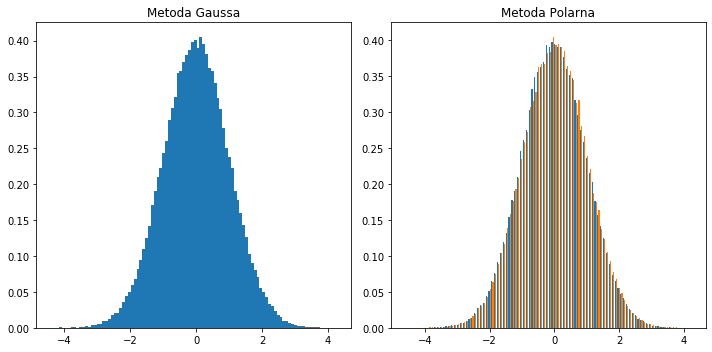

In [41]:
from matplotlib import pyplot
from numpy import random

size = 100000
number_of_bins = 100

fig, axs = pyplot.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].hist(random.normal(size=size), density=True, bins=number_of_bins)
axs[0].title.set_text('Metoda Gaussa')

axs[1].hist(problem_A1(size), density=True, bins=number_of_bins)
axs[1].title.set_text('Metoda Polarna')

pyplot.show()

## c) Obliczyc eksperymentalne znaczenia dla wartosci sredniej oraz wariancji

In [184]:
## nie jestem pewien ktora zmienna powinnismy przelicac tutaj

size = 100000
results = problem_A1(size)
sumAll = 0
for i in results[1]:
    sumAll += i
avg = sumAll/size
print(f'Average value of Polar method equals: {avg}')

Average value of Polar method equals: 0.0030654899039890536


## Problem B i C
### Ruina gracza dla 2 graczy A,B
### Kapitaly poczatkowe A,B: 
### a = 50; b=50 
### Porównanie z wynykiem analitycznym dla roznych a,b

In [64]:
import numpy

n_simulations = 1000
wins = 0

prob_B_win = 0.5
A_balance = 70
B_balance = 30
winsOfA = 0

bet = 2

for i in range(n_simulations):
    A_current_balance = A_balance
    B_current_balance = B_balance

    while A_current_balance > 0 and B_current_balance > 0:
        a_win = numpy.random.uniform(0, 1) < prob_B_win

        if a_win:
            winsOfA += 1
            A_current_balance = A_current_balance + bet
            B_current_balance = B_current_balance - bet
        else:
            A_current_balance = A_current_balance - bet
            B_current_balance = B_current_balance + bet

    if A_current_balance > 0: wins += 1 

prob_a_wins = wins/n_simulations

print(f'A wygrywal z prawdopodobienstwem: {prob_a_wins}')
print(f'B wygrywal z prawdopodobienstwem: {1 - prob_a_wins}')

ruinsA = 1 - (A_balance/(B_balance + A_balance))
ruinsB = 1 - (B_balance/(B_balance + A_balance))
print(f'Wzor analityczny dla ruiny gracza a : {ruinsA}')
print(f'Wzor analityczny dla ruiny gracza b : {ruinsB}')

A wygrywal z prawdopodobienstwem: 0.688
B wygrywal z prawdopodobienstwem: 0.31200000000000006
Wzor analityczny dla ruiny gracza a : 0.30000000000000004
Wzor analityczny dla ruiny gracza b : 0.7


## Problem D
### Liczba rozgrywek do ukonczenia gry - L
### Wyliczyc srednia dlugosc rozgrywki
### pA = 1/2, 1/5, 4/5; a = b = 50; calkowita liczba gier = 20000 

In [16]:
import numpy

simulations = 20000

prob_B_win = 0.5
A_balance = 50
B_balance = 50
bet = 2
number_of_games_in_single_party = []
for i in range(simulations):
    A_current_balance = A_balance
    B_current_balance = B_balance
    games = 0
    while A_current_balance > 0 and B_current_balance > 0:
        games += 1
        a_win = numpy.random.uniform(0, 1) < prob_B_win

        if a_win:
            winsOfA += 1
            A_current_balance = A_current_balance + bet
            B_current_balance = B_current_balance - bet
        else:
            A_current_balance = A_current_balance - bet
            B_current_balance = B_current_balance + bet
    number_of_games_in_single_party.append(games)
print(number_of_games_in_single_party)
print(f'Average number of games {sum(number_of_games_in_single_party)/simulations}')


[111, 1005, 389, 879, 205, 215, 3533, 317, 1005, 303, 123, 787, 193, 1555, 357, 161, 441, 607, 165, 133, 819, 1289, 113, 495, 249, 883, 1045, 1001, 475, 201, 449, 413, 563, 875, 1729, 125, 699, 1545, 207, 147, 561, 255, 141, 1435, 205, 275, 803, 167, 821, 871, 205, 597, 2311, 401, 319, 265, 157, 461, 267, 109, 593, 469, 809, 337, 271, 925, 3049, 1059, 535, 1141, 265, 197, 237, 957, 187, 821, 379, 381, 659, 285, 161, 2263, 695, 175, 199, 1377, 123, 487, 327, 169, 223, 793, 261, 1871, 243, 143, 1041, 433, 481, 249, 85, 1389, 1529, 557, 121, 235, 837, 893, 437, 271, 827, 229, 267, 649, 213, 327, 499, 139, 2013, 707, 383, 557, 293, 421, 391, 397, 1073, 71, 761, 279, 161, 159, 1061, 281, 253, 1313, 787, 533, 453, 333, 823, 1025, 999, 1245, 169, 295, 597, 341, 331, 301, 817, 455, 207, 183, 425, 581, 113, 431, 343, 799, 1489, 201, 573, 189, 1553, 207, 445, 1687, 575, 355, 151, 121, 331, 73, 807, 315, 443, 495, 745, 539, 105, 659, 129, 583, 167, 605, 415, 1555, 333, 817, 479, 211, 141, 1429, 2

## Problem G
### Trajektoria liczby wygranych dla 1 z 2 graczy
### dla kilku gier(do 10) dla róznych wartosci 
### pA: 1/2, 1/5, 4/5 
### Trajektoria kapitalu dla 1 z 2 graczy

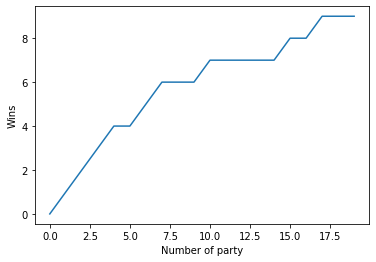

In [42]:
import numpy
import matplotlib.pyplot as plt

simulations = 20

wins_overall = 0
win_per_round = []
number_of_games = range(simulations)

prob_B_win = 0.5
A_balance = 50
B_balance = 50
bet = 2
number_of_games_in_single_party = []

for i in range(simulations):
    a_win = numpy.random.uniform(0, 1) < prob_B_win

    if a_win:
        wins_overall += 1
        win_per_round.append(wins_overall)
        A_balance = A_balance + bet
        B_balance = B_balance - bet
    else:
        win_per_round.append(wins_overall)
        A_balance = A_balance - bet
        B_balance = B_balance + bet
#             
# len(win_per_round)
plt.plot(win_per_round)
plt.ylabel('Wins')
plt.xlabel('Number of party')
plt.show()